In [1]:
from PredictiveNetwork import PredictiveCodingNetwork
import scipy.io
import scipy.ndimage
import numpy as np
import matplotlib.pyplot as plt
import torch 
from fancy_einsum import einsum

Files already downloaded and verified
Files already downloaded and verified


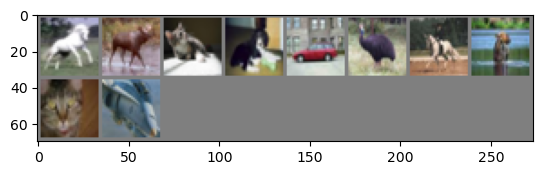

horse  deer   cat   dog   car  bird horse  deer   cat plane
torch.Size([3, 32, 32])


In [5]:
# Import necessary packages
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.utils.data as data_utils

# Define a function to unnormalize and plot your images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Define the transform
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and load the CIFAR10 datasets
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create the data loaders
trainloader = data_utils.DataLoader(trainset, batch_size=200, shuffle=True)
testloader = data_utils.DataLoader(testset, batch_size=10, shuffle=True)

# Define classes for CIFAR10 dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images, 2 rows of 5
imshow(torchvision.utils.make_grid(images[:10]))
print(' '.join('%5s' % classes[labels[j]] for j in range(10)))

# Print the shape of an image
print(images[0].shape)


In [6]:
# change images to be (batch_size, channels, height, width)
input_images = images
input_size = input_images.shape[1:]
print(input_images.shape, input_size)

model = PredictiveCodingNetwork(input_size=input_size, 
                n_layers=2, n_causes=[8, 4], kernel_size=[[8,8],[3,3]], stride=[4, 2], padding=0,
                    lam=0.1, alpha=0.1, k1=.05, k2=0.05, sigma2=1.)

# run the model for 500 timesteps
for i in range(1):
    # get next training image
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    input_images = images
    
    _ = model(input_images, timesteps=1000, train_U=True)


torch.Size([200, 3, 32, 32]) torch.Size([3, 32, 32])


AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [ ]:
# print the shape of U and r for each level descriptively
for i in range(len(model.layers)):
    print('U{}: {}'.format(i, model.layers[i].U.shape))
    print('r{}: {}'.format(i, model.layers[i].r.shape))

# print the mean and std of the U and r for each level
for i in range(len(model.layers)):
    print('U{}: mean: {}, std: {}'.format(i, model.layers[i].U.mean(), model.layers[i].U.std()))
    print('r{}: mean: {}, std: {}'.format(i, model.layers[i].r.mean(), model.layers[i].r.std()))

# print the mean and std of the images
print('input mean: {}, std: {}'.format(input_images.mean(), input_images.std()))

U0: torch.Size([8, 3, 8, 8])
r0: torch.Size([200, 8, 7, 7])
U1: torch.Size([4, 8, 3, 3])
r1: torch.Size([200, 4, 3, 3])
U0: mean: 0.2628577649593353, std: 0.007768213748931885
r0: mean: 0.16538920998573303, std: 0.07643037289381027
U1: mean: 0.11483971029520035, std: 0.002951495349407196
r1: mean: 0.25779998302459717, std: 0.14006935060024261
input mean: 0.4858059585094452, std: 0.2547449469566345


torch.Size([8, 3, 8, 8])


IndexError: index 8 is out of bounds for axis 0 with size 8

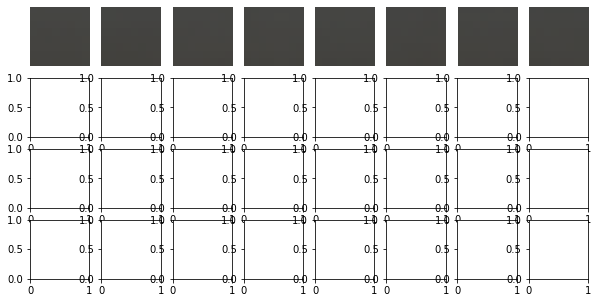

In [129]:
# now let's look at the U and r for each level
# first let's look at the U, print out shape of U
print(model.layers[0].U.shape)
U0 = model.layers[0].U.detach().numpy()
# plot the 32 U's for the first level
fig, ax = plt.subplots(4, 8, figsize=(10, 5))
for i in range(4):
    for j in range(8):
        to_plot = U0[i*8+j] #
        # shape is (channels, height, width), so we need to transpose to (height, width, channels)
        # make sure each channel is 0-1
        #to_plot = (to_plot - to_plot.min()) / (to_plot.max() - to_plot.min())
        to_plot = np.transpose(to_plot, (1, 2, 0))
        ax[i, j].imshow(to_plot)
        ax[i, j].axis('off')
plt.show()
        

In [30]:
to_plot

array([[[0.06641056, 0.06599116, 0.06618571, 0.06640767, 0.06571931,
         0.06519058],
        [0.06592645, 0.06563547, 0.06580753, 0.06596322, 0.06531354,
         0.06473991],
        [0.06579261, 0.06545899, 0.06549985, 0.06576154, 0.06504254,
         0.06435254],
        [0.06529001, 0.06474612, 0.06498779, 0.06529997, 0.06435616,
         0.06381076],
        [0.06379831, 0.06331912, 0.0634191 , 0.06375077, 0.06292793,
         0.06239277],
        [0.06292854, 0.06229018, 0.06212242, 0.06258438, 0.06179006,
         0.06116314]],

       [[0.0633395 , 0.06280907, 0.06293859, 0.06313353, 0.06244341,
         0.06191403],
        [0.06255129, 0.06215736, 0.06231847, 0.06240036, 0.06178152,
         0.06127375],
        [0.06233568, 0.0618866 , 0.06184265, 0.06207897, 0.06138502,
         0.06070576],
        [0.06183698, 0.06113445, 0.06129458, 0.06158864, 0.06064002,
         0.06011497],
        [0.06012936, 0.05949484, 0.05958764, 0.05983771, 0.05904225,
         0.05861333